# Selecting Appropriate Variables

In [1]:
import pandas as pd
from pathlib import Path

In [3]:
df = pd.read_csv("../combined_ar6_data.csv")

In [15]:
# Filter to just 'World' region
df = df[df["region"] == "World"]

# For now, I am only going to focus on 2050 projections as that is a standard net zero target year for corporations 
df = df[df["year"] == 2050]

In [17]:
total_scenarios = df[["model", "scenario"]].drop_duplicates().shape[0]
print(f"Total scenarios: {total_scenarios}")

Total scenarios: 2098


In [39]:
df.head(20)

,model,scenario,region,variable,unit,year,value,source_file
6,MESSAGEix-GLOBIOM_GEI 1.0,SSP2_openres_lc_CB400,World,Water Withdrawal|Heat|Oil,km3/yr,2050,0.000006,Water_Withdrawal__Heat__Oil.csv
274,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_600f_DR4p,World,Water Withdrawal|Heat|Oil,km3/yr,2050,0.000000,Water_Withdrawal__Heat__Oil.csv
651,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_2000f,World,Water Withdrawal|Heat|Oil,km3/yr,2050,0.000000,Water_Withdrawal__Heat__Oil.csv
938,MESSAGEix-GLOBIOM_1.1,EN_INDCi2030_1400f,World,Water Withdrawal|Heat|Oil,km3/yr,2050,0.000000,Water_Withdrawal__Heat__Oil.csv
1225,MESSAGEix-GLOBIOM_1.1,EN_INDCi2030_3000f_NDCp,World,Water Withdrawal|Heat|Oil,km3/yr,2050,0.000000,Water_Withdrawal__Heat__Oil.csv
1602,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1200f,World,Water Withdrawal|Heat|Oil,km3/yr,2050,0.000000,Water_Withdrawal__Heat__Oil.csv
1889,MESSAGEix-GLOBIOM_1.1,EN_NoPolicy,World,Water Withdrawal|Heat|Oil,km3/yr,2050,0.000000,Water_Withdrawal__Heat__Oil.csv
2266,MESSAGEix-GLOBIOM_1.1,EN_INDCi2030_1800f_COV,World,Water Withdrawal|Heat|Oil,km3/yr,2050,0.000000,Water_Withdrawal__Heat__Oil.csv
2643,MESSAGEix-GLOBIOM_1.1,EN_INDCi2030_1400f_COV,World,Water Withdrawal|Heat|Oil,km3/yr,2050,0.000000,Water_Withdrawal__Heat__Oil.csv
3020,MESSAGEix-GLOBIOM_1.1,EN_INDCi2030_3000_NDCp,World,Water Withdrawal|Heat|Oil,km3/yr,2050,0.000000,Water_Withdrawal__Heat__Oil.csv


In [31]:
total_vars = df["variable"].nunique()
print(f"Total unique variables reported in 2050: {total_vars}")

Total unique variables reported in 2050: 1418


In [42]:
# Group by variable, count unique (model, scenario) pairs
var_coverage = (
    df.groupby("variable")[["model", "scenario"]]
    .apply(lambda x: x.drop_duplicates().shape[0])
    .reset_index(name="scenario_pair_count")
    .sort_values("scenario_pair_count", ascending=False)
)

# Sort descending by scenario_count
variable_coverage_sorted = var_coverage.sort_values("scenario_pair_count", ascending=False)

# Display top variables
print(variable_coverage_sorted.head(10))


                                               variable  scenario_pair_count
1084                              Primary Energy|Fossil                 1885
1087                                 Primary Energy|Gas                 1885
1099              Primary Energy|Non-Biomass Renewables                 1879
1107                                 Primary Energy|Oil                 1878
1118          Primary Energy|Renewables (incl. Biomass)                 1878
1074                                Primary Energy|Coal                 1878
1058                                     Primary Energy                 1878
1105                             Primary Energy|Nuclear                 1877
369                                       Emissions|CO2                 1863
1149  Secondary Energy|Electricity|Non-Biomass Renew...                 1858


The highest possible coverage of the variable space is 89% with 1885 scenarios including that variable. We will accept, as a first culling step, those variables that are included in 80% of this top level so 80% of 1885 or 1484. This means the overall percentage is 71%. 

______

# Performing Reductions

In [43]:
df_pairs = df[["model", "scenario", "variable"]].drop_duplicates()

In [44]:
coverage = (
    df_pairs.groupby("variable")[["model", "scenario"]]
    .size()
    .reset_index(name="scenario_pair_count")
    .sort_values("scenario_pair_count", ascending=False)
)


In [46]:
coverage["coverage_pct"] = coverage["scenario_pair_count"] / total_scenarios

In [59]:
well_covered_vars = coverage[coverage["coverage_pct"] >= 0.6]["variable"].tolist()
print(f"Variables with ≥71% scenario coverage in 2050: {len(well_covered_vars)}")

Variables with ≥71% scenario coverage in 2050: 149


In [240]:
coverage.variable.tolist()

['Primary Energy|Fossil',
 'Primary Energy|Gas',
 'Primary Energy|Non-Biomass Renewables',
 'Primary Energy|Oil',
 'Primary Energy|Renewables (incl. Biomass)',
 'Primary Energy|Coal',
 'Primary Energy',
 'Primary Energy|Nuclear',
 'Emissions|CO2',
 'Secondary Energy|Electricity|Non-Biomass Renewables',
 'Secondary Energy|Electricity|Nuclear',
 'Secondary Energy|Electricity|Renewables (incl. Biomass)',
 'Secondary Energy|Electricity',
 'Final Energy|Transportation',
 'Secondary Energy|Electricity|Hydro',
 'Secondary Energy|Electricity|Fossil',
 'AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|83.3th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|10.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|16.7th Percentile',
 'AR6 climate diagnostics|Surf

______

# Finding Sector-Specific Variables

In [70]:
well_covered_vars

['Primary Energy|Fossil',
 'Primary Energy|Gas',
 'Primary Energy|Non-Biomass Renewables',
 'Primary Energy|Oil',
 'Primary Energy|Renewables (incl. Biomass)',
 'Primary Energy|Coal',
 'Primary Energy',
 'Primary Energy|Nuclear',
 'Emissions|CO2',
 'Secondary Energy|Electricity|Non-Biomass Renewables',
 'Secondary Energy|Electricity|Nuclear',
 'Secondary Energy|Electricity|Renewables (incl. Biomass)',
 'Secondary Energy|Electricity',
 'Final Energy|Transportation',
 'Secondary Energy|Electricity|Hydro',
 'Secondary Energy|Electricity|Fossil',
 'AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|83.3th Percentile',
 'AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|10.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|16.7th Percentile',
 'AR6 climate diagnostics|Surf

I took these out of the notebook to categorize with an LLM. I will now load back in the categorized, sector-specific variables

In [119]:
sector_vars = pd.read_csv('../categorized_variables.csv')

In [120]:
sector_vars

,Variable,Sector
0,Primary Energy|Biomass,AFOLU
1,Emissions|CO2|AFOLU,AFOLU
2,Final Energy|Solids|Biomass,AFOLU
3,Carbon Sequestration|CCS|Biomass,AFOLU
4,Secondary Energy|Liquids|Biomass,AFOLU
5,Emissions|CH4|AFOLU,AFOLU
6,Emissions|N2O|AFOLU,AFOLU
7,Primary Energy|Biomass|Modern|w|CCS,AFOLU
8,Primary Energy|Biomass|Modern|w o CCS,AFOLU
9,Secondary Energy|Electricity|Non-Biomass Renew...,Electricity


In [246]:
#make a list of all the variables in each sector 

sector_vars_dict = sector_vars.groupby("Sector")["Variable"].apply(list).to_dict()

In [121]:
sector_vars_list = sector_vars["Variable"].tolist()

In [122]:
# see the correlation between these variables
df_filtered = df[df["variable"].isin(sector_vars_list)].copy()
print(f"Filtered to {df_filtered['variable'].nunique()} variables and {df_filtered.shape[0]} rows")

Filtered to 51 variables and 82152 rows


In [123]:
#count the number of scenarios remaining 
remaining_scenarios = df_filtered[["model", "scenario"]].drop_duplicates().shape[0]
print(f"Remaining scenarios after filtering: {remaining_scenarios}")

Remaining scenarios after filtering: 1939


What if we include only those scenarios where we have full coverage? 

In [124]:
#see how many variables each of those scenarios contains 
df_pivot = df_filtered.pivot_table(
    index=["model", "scenario"],
    columns="variable",
    values="value",
    aggfunc="first"
)

In [125]:
#count the number of scenarios that contain all variables
complete_scenarios = df_pivot.dropna().shape[0]
print(f"Scenarios with complete variable coverage: {complete_scenarios}")

Scenarios with complete variable coverage: 417


417 scenarios is sufficient so we will proceed with only these for now. 

**Could revisit infilling in the future for more scenario coverage**

In [126]:
df_complete = df_pivot.dropna()

-------

# Assessing Colinearity

In [127]:
corr_matrix = df_complete.corr()
corr_matrix = corr_matrix.abs() 

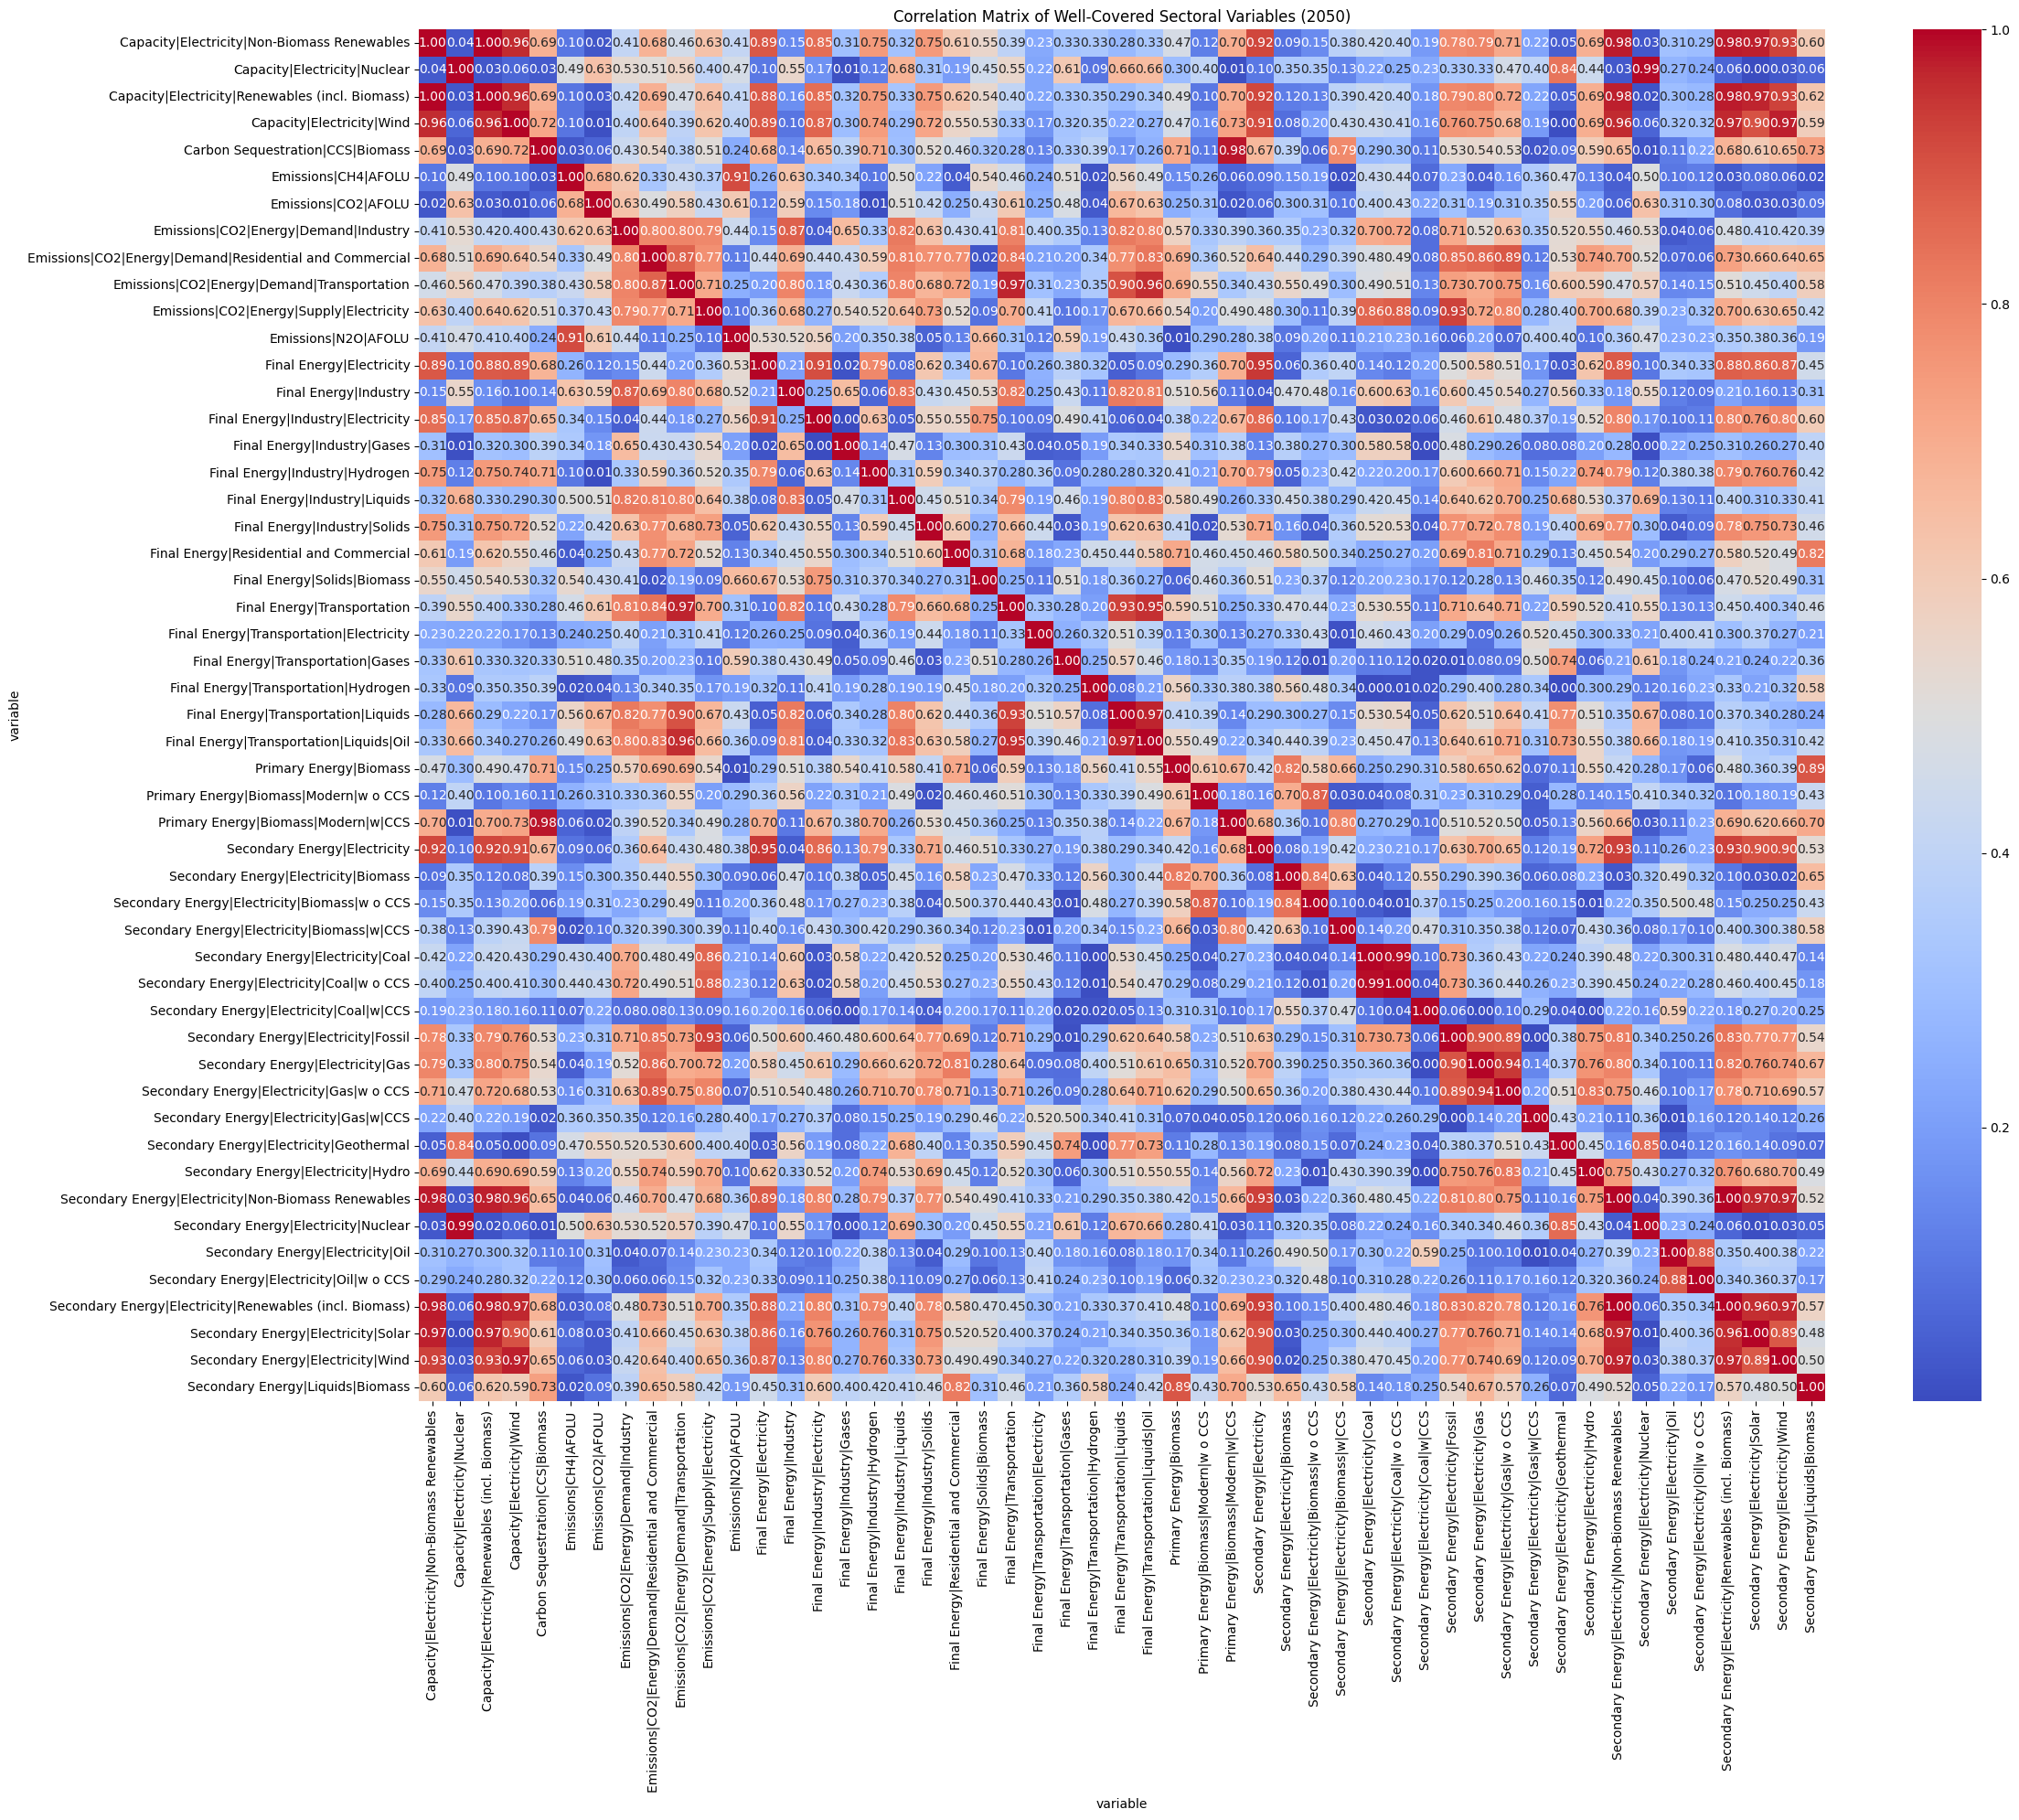

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix of Well-Covered Sectoral Variables (2050)")
plt.tight_layout()
plt.show()

In [129]:
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_complete)

_____

# Selecting 10 subsets of variables

Each subset will have 2 variables from each sector. Since there are 10 sectors, this means each run will include 10 variables. Since Residential & Commercial only have 2 variables in the dataset, those will be selected every time. 

We will: 

1. Select the two Residential & Commercial variables
2. Select two variables randomly from the other four sectors 
3. Reject those two variables if they have a correlation with each other or other variables > 0.9 
4. Select another variable from that sector until condition 3 is met. THERE HAS TO BE 2 VARIABLES FROM EACH SECTOR. 
5. Continue until we have 10 variables, one from each sector

In [130]:
df_scaled = pd.DataFrame(X_scaled, index=df_complete.index, columns=df_complete.columns)

In [131]:
corr_matrix = df_scaled.corr().abs()

In [132]:
sector_mapping = sector_vars.set_index("Variable")["Sector"].to_dict()

In [133]:
from collections import defaultdict
sector_groups = defaultdict(list)
for var, sector in sector_mapping.items():
    sector_groups[sector].append(var)

In [231]:
import random
from collections import Counter

def select_valid_subset(sector_groups, corr_matrix, threshold=0.8):
    final_selection = []
    
    # Always select 1 Residential & Commercial variable
    res_com_vars = sector_groups.get("Residential & Commercial", [])
    if len(res_com_vars) < 1:
        raise ValueError(f"No Residential & Commercial variables provided.")
    
    chosen_res = random.choice(res_com_vars)
    final_selection.append(chosen_res)

    # Iterate through other sectors
    for sector, candidates in sector_groups.items():
        if sector == "Residential & Commercial":
            continue  # already handled
        
        attempts = 0
        valid = False
        
        while attempts < 1000 and not valid:
            chosen = random.choice(candidates)
            temp_selection = final_selection + [chosen]
            
            sub_corr = corr_matrix.loc[temp_selection, temp_selection].copy()
            np.fill_diagonal(sub_corr.values, 0)
            
            max_corr = sub_corr.to_numpy().max()
            if max_corr <= threshold:
                final_selection.append(chosen)
                valid = True
            else:
                attempts += 1
        
        if not valid:
            raise ValueError(f"Could not find valid variable for sector '{sector}' after {attempts} attempts.")
    
    # Final verification
    sector_counts = Counter(
        sector for var in final_selection for sector, vars in sector_groups.items() if var in vars
    )
    
    for sector, count in sector_counts.items():
        if count != 1:
            raise ValueError(f"Sector '{sector}' does not have exactly 1 variable (found {count}).")

    return final_selection


In [232]:
counter = 0 
subsets = []
while (counter < 10):
    counter += 1
    subset = select_valid_subset(sector_groups, corr_matrix)
    subsets.append(subset)
    print("Selected Variables:")
    for var in subset:
        print(f"- {var}")

Selected Variables:
- Emissions|CO2|Energy|Demand|Residential and Commercial
- Secondary Energy|Liquids|Biomass
- Emissions|CO2|Energy|Supply|Electricity
- Final Energy|Industry|Solids
- Final Energy|Transportation|Gases
Selected Variables:
- Final Energy|Residential and Commercial
- Primary Energy|Biomass|Modern|w|CCS
- Capacity|Electricity|Renewables (incl. Biomass)
- Final Energy|Industry|Solids
- Final Energy|Transportation|Gases
Selected Variables:
- Emissions|CO2|Energy|Demand|Residential and Commercial
- Primary Energy|Biomass|Modern|w o CCS
- Secondary Energy|Electricity|Oil|w o CCS
- Final Energy|Industry|Gases
- Final Energy|Transportation|Hydrogen
Selected Variables:
- Final Energy|Residential and Commercial
- Final Energy|Solids|Biomass
- Secondary Energy|Electricity|Geothermal
- Final Energy|Industry|Gases
- Emissions|CO2|Energy|Demand|Transportation
Selected Variables:
- Emissions|CO2|Energy|Demand|Residential and Commercial
- Secondary Energy|Liquids|Biomass
- Secondary 

## Ensuring Sufficient Differences Between the Subsets

In [233]:
import numpy as np

n = len(subsets)
jaccard_matrix = np.zeros((n, n))

for i in range(n):
    set_i = set(subsets[i])
    for j in range(n):
        set_j = set(subsets[j])
        intersection = len(set_i & set_j)
        union = len(set_i | set_j)
        jaccard = intersection / union
        jaccard_matrix[i, j] = jaccard

jaccard_df = pd.DataFrame(jaccard_matrix, 
                          columns=[f"Subset {i+1}" for i in range(n)],
                          index=[f"Subset {i+1}" for i in range(n)])



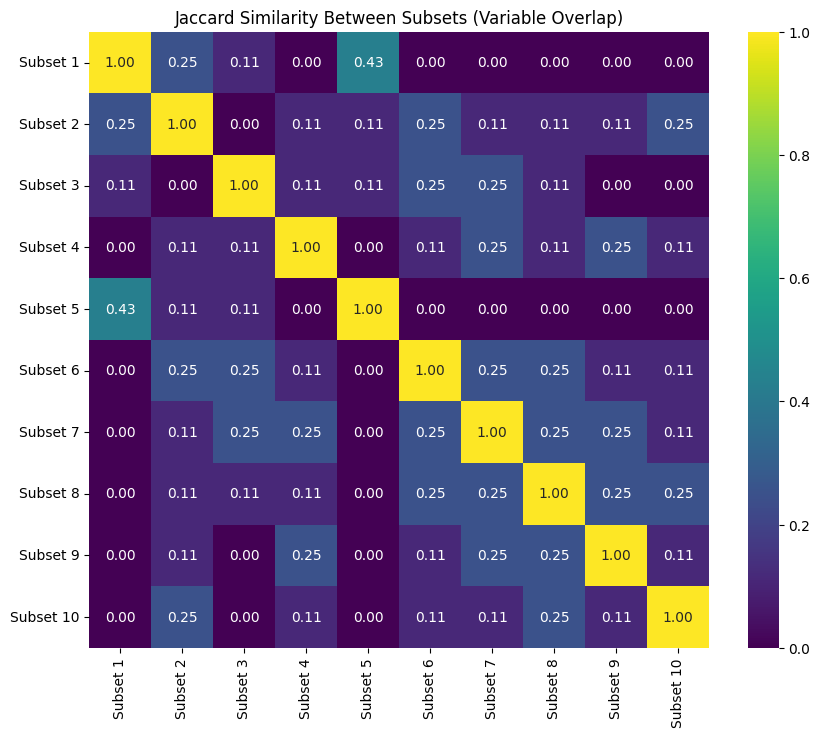

In [234]:
plt.figure(figsize=(10, 8))
sns.heatmap(jaccard_df, annot=True, fmt=".2f", cmap="viridis")
plt.title("Jaccard Similarity Between Subsets (Variable Overlap)")
plt.show()


In [235]:
# Assuming jaccard_matrix from previous code
n = len(subsets)
similarities = []

for i in range(n):
    for j in range(i + 1, n):
        similarities.append(jaccard_matrix[i, j])

# Compute average
average_jaccard = sum(similarities) / len(similarities)
print(f"Average Jaccard Similarity Across Subsets: {average_jaccard:.3f}")


Average Jaccard Similarity Across Subsets: 0.121


In [236]:
#create dataframes from df_scaled based on the selected subsets
subset_dfs = {}
for i, subset in enumerate(subsets):
    df_subset = df_scaled[subset].copy()
    
    # Add model and scenario back from df_complete's index
    df_subset = df_subset.reset_index()  

    df_subset["model_scenario"] = df_subset["model"] + " | " + df_subset["scenario"]

    cols = ["model_scenario"] + [col for col in df_subset.columns if col not in ["model", "scenario", "model_scenario"]]
    df_subset = df_subset[cols]
    
    # Store in dictionary
    subset_dfs[f"subset_{i+1}"] = df_subset

In [237]:
subset_dfs['subset_1']

variable,model_scenario,Emissions|CO2|Energy|Demand|Residential and Commercial,Secondary Energy|Liquids|Biomass,Emissions|CO2|Energy|Supply|Electricity,Final Energy|Industry|Solids,Final Energy|Transportation|Gases
0,AIM/CGE 2.1 | CO_2Deg2020,-0.053566,1.864326,-1.150480,-0.788561,-0.665094
1,AIM/CGE 2.1 | CO_2Deg2030,-1.090803,2.151802,-1.104297,-0.883271,-0.781801
2,AIM/CGE 2.1 | CO_Bridge,-0.227394,1.777979,-0.866840,-0.828617,-0.666637
3,AIM/CGE 2.1 | CO_GPP,0.127284,1.427473,-0.278613,-0.756333,-0.607655
4,AIM/CGE 2.1 | CO_NDCplus,0.767194,1.235209,2.333350,-0.063605,-0.437728
...,...,...,...,...,...,...
412,REMIND-Transport 2.1 | Transport_Budg1100_Elec...,-1.148676,1.477495,-0.714986,-1.141663,-0.537254
413,REMIND-Transport 2.1 | Transport_Budg1100_Elec...,-1.106513,1.305489,-0.676840,-1.148049,-0.596361
414,REMIND-Transport 2.1 | Transport_Budg1100_H2Push,-1.199300,1.770147,-0.770013,-1.144129,-0.418620
415,REMIND-Transport 2.1 | Transport_NDC_Conv,0.303735,0.034336,0.217775,-0.075009,-0.301378


In [238]:
#save all the subset dfs to separate CSV files in a folder titled selected_subsets
output_dir = Path("selected_subsets")
output_dir.mkdir(exist_ok=True)

for name, subset_df in subset_dfs.items():
    output_path = output_dir / f"{name}.csv"
    subset_df.to_csv(output_path, index=False)
    print(f"Saved {name} to {output_path}")

Saved subset_1 to selected_subsets/subset_1.csv
Saved subset_2 to selected_subsets/subset_2.csv
Saved subset_3 to selected_subsets/subset_3.csv
Saved subset_4 to selected_subsets/subset_4.csv
Saved subset_5 to selected_subsets/subset_5.csv
Saved subset_6 to selected_subsets/subset_6.csv
Saved subset_7 to selected_subsets/subset_7.csv
Saved subset_8 to selected_subsets/subset_8.csv
Saved subset_9 to selected_subsets/subset_9.csv
Saved subset_10 to selected_subsets/subset_10.csv


_____ 

## Create one subset that is just final energy and emissions for the sectors 

In [241]:
variables = [
    'Emissions|CO2|Energy|Demand|Residential and Commercial',
    'Final Energy|Residential and Commercial',
    'Final Energy|Transportation',
    'Emissions|CO2|Energy|Demand|Transportation',
    'Final Energy|Industry',
    'Emissions|CO2|Energy|Demand|Industry',
    'Final Energy|Electricity',
    'Emissions|CO2|Energy|Supply|Electricity',
    'Emissions|CO2|AFOLU',
    'Primary Energy|Biomass'
]


In [243]:
df_subset = df_scaled[variables].copy()
    
# Add model and scenario back from df_complete's index
df_subset = df_subset.reset_index()  

df_subset["model_scenario"] = df_subset["model"] + " | " + df_subset["scenario"]

cols = ["model_scenario"] + [col for col in df_subset.columns if col not in ["model", "scenario", "model_scenario"]]
df_subset = df_subset[cols]

In [244]:
output_path = output_dir / "subset_x.csv"
df_subset.to_csv(output_path, index=False)

In [249]:
for sector in sector_vars_dict:
    print(f"{sector}: {len(sector_vars_dict[sector])} variables")
    variables = sector_vars_dict[sector]
    df_subset = df_scaled[variables].copy()
    df_subset = df_subset.reset_index()  
    df_subset["model_scenario"] = df_subset["model"] + " | " + df_subset["scenario"]
    cols = ["model_scenario"] + [col for col in df_subset.columns if col not in ["model", "scenario", "model_scenario"]]
    df_subset = df_subset[cols]

    output_path = output_dir / f"{sector}_variables.csv"
    df_subset.to_csv(output_path, index=False)
    

AFOLU: 9 variables
Electricity: 28 variables
Industry: 6 variables
Residential & Commercial: 2 variables
Transport: 6 variables
